In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./dataset/indian_liver_patient.csv')
data.head()
#Meet Mehta 20BCP126

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
data.Albumin_and_Globulin_Ratio.fillna(data.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64


In [6]:
list = X.columns
list

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for x in list:
    X[x] = sc.fit_transform(X[x].values.reshape(-1,1))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# print(y_train.mean(),y_test.mean())
print(y_test)

246    1
92     1
386    2
186    1
389    1
      ..
71     1
560    1
102    1
369    1
108    2
Name: Dataset, Length: 146, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

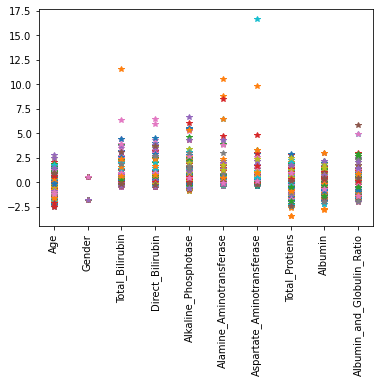

In [10]:
plt.plot(X_train.T, '*')
plt.xticks(rotation= 'vertical')

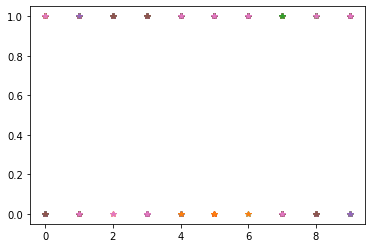

In [11]:
xnewtrain = X_train.apply(pd.cut, bins=2,labels=[1,0]).values
plt.plot(xnewtrain.T, '*');

In [12]:
xnewtest = X_test.apply(pd.cut, bins=2,labels=[1,0]).values
xnewtrain

array([[1, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1]], dtype=object)

In [13]:
for b in range(xnewtrain.shape[1]+1):
  y_pred = []
  accurate_rows = 0
  for x,y in zip(xnewtrain,y_train):
    pred = np.sum(x)>=b 
    y_pred.append(pred)
    accurate_rows += (y == pred)
  print(b, accurate_rows/xnewtrain.shape[0])

0 0.7231121281464531
1 0.7231121281464531
2 0.7231121281464531
3 0.7231121281464531
4 0.7231121281464531
5 0.7208237986270023
6 0.7139588100686499
7 0.6086956521739131
8 0.34553775743707094
9 0.15102974828375287
10 0.02517162471395881


In [14]:
y_test

246    1
92     1
386    2
186    1
389    1
      ..
71     1
560    1
102    1
369    1
108    2
Name: Dataset, Length: 146, dtype: int64

In [15]:
from sklearn.metrics import accuracy_score
b=8
y_pred = []
for x in xnewtest:
    pred= np.sum(x)>=b
    y_pred.append(pred)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.19863013698630136


In [16]:
class Perceptron:
    def _init_(self):
        self.w=None
        self.b=None

    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
        Y=[]
        for x in X:
            res=self.model(x)
            Y.append(res)
        return(np.array(Y))

    def fit(self, X, Y, epoches, lr):
        self.w = np.ones(X.shape[1])
        self.b = 0

        for i in range(epoches):
            accuracy = {}
            max_acc = 0
            for x,y in zip(X,Y):
                pred = self.model(x)
                if y == 1 and pred == 2:
                    self.w = self.w + lr* x
                    self.b =  self.b - lr* 1
                elif y == 2 and pred == 1:
                    self.w = self.w - lr* x
                    self.b =  self.b + lr* 1
            accuracy[i] = accuracy_score(self.predict(X), y_train)
            if accuracy[i] > max_acc:
                max_acc = accuracy[i]

        print(max_acc)

In [17]:
X_train = X_train.values

In [18]:
model = Perceptron()
model.fit(X_train, y_train, 100, 0.12)

0.14645308924485126


In [19]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(xnewtest)
print(accuracy_score(y_test, y_pred))

0.684931506849315


In [20]:
y_train_pred = model.predict(xnewtrain)
print(accuracy_score(y_train, y_train_pred))

y_test_pred = model.predict(xnewtest)
print(accuracy_score(y_test, y_test_pred))

0.7231121281464531
0.684931506849315


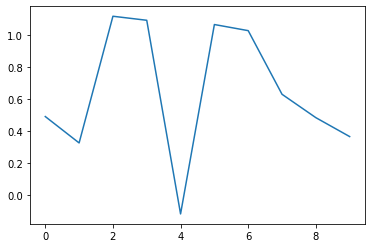

In [21]:
plt.plot(model.w);